<a href="https://colab.research.google.com/github/Hardikmirani/Kabaddi_DA/blob/main/Copy_of_Kabaddi_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Project title : - KABADDI - PLAYER AND TEAM PERFORMANCE ANALYSIS </h1>

Dataset :

DS_players.xlsx
DS_team.xlsx <b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

READ EXCEL FILES

In [ ]:
df_player = pd.read_excel('/content/drive/MyDrive/Hardik - Kabaddi/DS_players.xlsx')
df_team = pd.read_excel('/content/drive/MyDrive/Hardik - Kabaddi/DS_team.xlsx')

<h3>GET INFO ABOUT DATASET </h3>

In [ ]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16892 entries, 0 to 16891
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          16892 non-null  int64  
 1   index                               16892 non-null  int64  
 2   player_id                           16891 non-null  float64
 3   player_name                         16892 non-null  object 
 4   player_short_name                   1698 non-null   object 
 5   player_skill                        0 non-null      float64
 6   player_role                         0 non-null      float64
 7   player_red_card                     16892 non-null  bool   
 8   player_yellow_card                  16892 non-null  bool   
 9   player_green_card                   16892 non-null  bool   
 10  player_jersey                       16892 non-null  int64  
 11  player_played                       16892

In [ ]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1368 non-null   int64  
 1   id                                        1368 non-null   int64  
 2   match_id                                  1368 non-null   int64  
 3   name                                      1368 non-null   object 
 4   score                                     1368 non-null   int64  
 5   short_name                                1368 non-null   object 
 6   squad                                     1368 non-null   object 
 7   state_of_play                             0 non-null      float64
 8   state_of_play.is_raiding_now              596 non-null    float64
 9   state_of_play.last_raid.id                596 non-null    float64
 10  state_of_play.last_raid.result      

<h4><b>1. Data preprocessing code:

-Data Cleaning Process 
<b></h4>

<b>Drop Columns which includes all null values<br>

In [ ]:
# df_team.drop(['state_of_play'], axis=1, inplace=True)

# df_player.drop(['player_skill','player_role'], axis=1, inplace=True)


<h3><b>An Extra Visulization to get more idea about players(data) <b></h3>

note : - Not listed on Task

In [ ]:
df3 = df_player[df_player.player_played == True]
played = len(df3)
df4 = df_player[df_player.player_played == False]
not_played = len(df4)

data = [played,not_played]
labels = ['Players who played','Player who not play']


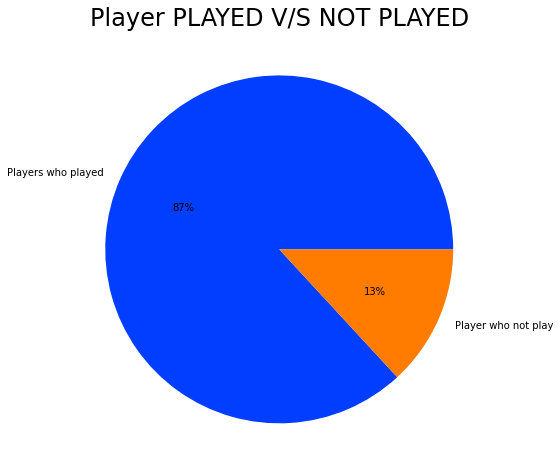

In [ ]:
colors = sns.color_palette('bright')

fig, ax = plt.subplots(figsize = ( 8,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title( "Player PLAYED V/S NOT PLAYED" , size = 24 )
plt.show()

<b>1.  The player who gave the greencards more often<b>


In [ ]:
green_c = df_player[df_player.player_green_card == True]
green_c.player_name
green_count=  green_c.pivot_table(index = ['player_name'], aggfunc='size')
green_count

q1 = green_count.sort_values(ascending=False)
head_q1 = q1.head(10)
head_q1
# q1_df = head_q1.to_frame()
# q1_df
df_v = head_q1.values
df_v

array([20, 20, 13, 11, 11, 11, 11, 10,  9,  9])

In [ ]:
q1_df = head_q1.to_frame().reset_index()
q1_df

,player_name,0
0,Sandeep Narwal,20
1,Manjeet Chhillar,20
2,Anup Kumar,13
3,Ajay Thakur,11
4,Jasvir Singh,11
5,Kuldeep Singh,11
6,Fazel Atrachali,11
7,Surjeet Singh,10
8,Monu Goyat,9
9,Vishal Bhardwaj,9


In [ ]:
labels = q1_df['player_name']
# labels = ['Sandeep Narwal',
# 'Manjeet Chhillar',
# 'Anup Kumar',
# 'Ajay Thakur',
# 'Jasvir Singh',
# 'Kuldeep Singh',
# 'Fazel Atrachali',  
# 'Surjeet Singh', 
# 'Monu Goyat',         
# 'Vishal Bhardwaj']

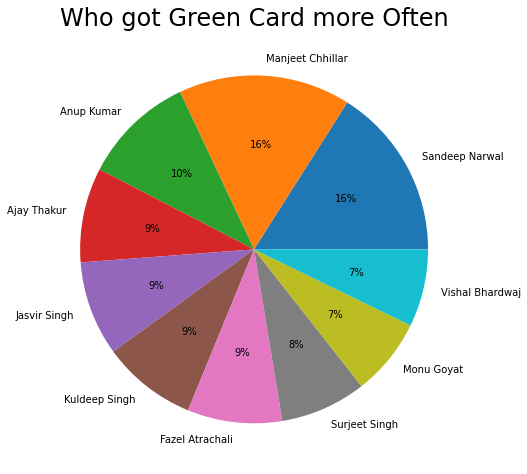

In [ ]:
fig, ax = plt.subplots(figsize = ( 8,8 ))
plt.pie(df_v,labels = labels, autopct='%.0f%%')
ax.set_title( "Who got Green Card more Often" , size = 24 )
plt.show()

<b>2.  TOP 5 TEAM WITH IT'S TACKLES POINT<b>

In [ ]:
tackle_p = df_team [df_team['stats.points.tackle_points.total'] > 19]
df = pd.DataFrame([ tackle_p.name ,tackle_p['stats.points.tackle_points.total'] ]).transpose()
df 

,name,stats.points.tackle_points.total
173,Patna Pirates,20
176,Puneri Paltan,20
551,Iran,21
560,India,20
564,Australia,20
573,Poland,20
580,India,24
587,Kenya,28
593,Kenya,23


In [ ]:
df_sort = df.sort_values("stats.points.tackle_points.total", ascending=False)
df_sort

,name,stats.points.tackle_points.total
587,Kenya,28
580,India,24
593,Kenya,23
551,Iran,21
173,Patna Pirates,20
176,Puneri Paltan,20
560,India,20
564,Australia,20
573,Poland,20


In [ ]:
q2 = df_sort.head(5)
q2

,name,stats.points.tackle_points.total
587,Kenya,28
580,India,24
593,Kenya,23
551,Iran,21
173,Patna Pirates,20


<function matplotlib.pyplot.show>

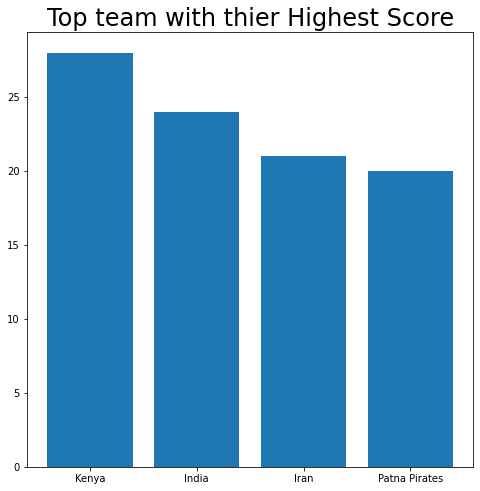

In [ ]:
x = q2['name']
y = q2['stats.points.tackle_points.total']
fig, ax = plt.subplots(figsize = ( 8,8 ))
plt.bar(x,y)
ax.set_title( "Top team with thier Highest Score" , size = 24 )
plt.show

In [ ]:

# sns.violinplot(x="stats.points.tackle_points.total", y="name", data=df_team)


3.  LOWEST 5 TEAM WITH IT'S TACKLES POINT 

In [ ]:
# tackle_l = df_team [df_team['stats.points.tackle_points.total'] <= 1]
# tackle_l
# df_l = pd.DataFrame([ tackle_l.name ,tackle_l['stats.points.tackle_points.total'] ]).transpose()
# df_l
# df_l_sort = df_l.sort_values("stats.points.tackle_points.total", ascending=True)
# df_l_sort

,name,stats.points.tackle_points.total
545,Australia,0
0,Jaipur Pink Panthers,1
28,U.P. Yoddha,1
29,Patna Pirates,1
89,Telugu Titans,1
538,USA,1
548,USA,1
595,England,1
862,Haryana Steelers,1
890,Puneri Paltan,1


In [ ]:
df_l_sort = df_team.sort_values("stats.points.tackle_points.total", ascending=True)
df_l_sort

In [ ]:
q3 = df_l_sort.head(5)
q3

,name,stats.points.tackle_points.total
545,Australia,0
0,Jaipur Pink Panthers,1
28,U.P. Yoddha,1
29,Patna Pirates,1
89,Telugu Titans,1


<function matplotlib.pyplot.show>

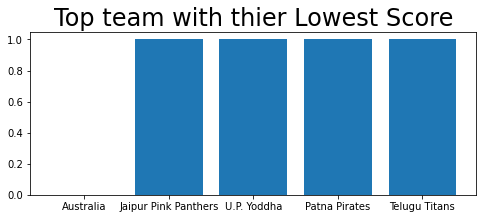

In [ ]:

x = q3['name']
y = q3['stats.points.tackle_points.total']
fig, ax = plt.subplots(figsize = ( 8,3))
plt.bar(x,y)
ax.set_title( "Top team with thier Lowest Score" , size = 24 )
plt.show

4.  TOP 10 PLAYER WHO IS ON COURT


In [ ]:
df = df_player[df_player.player_on_court == True]
df.player_name
df_count =  df.pivot_table(columns=['player_name'], aggfunc='size')
df_count
# df11= df_count.values
# df11

player_name
Abdul Shaikh          1
Abhilasha Mhatre      4
Abhinandhan Kumar     2
Abhishek N            1
Abhishek Singh       16
                     ..
Young Chang Ko       27
Yufen Lin             1
Yuten Kawate          2
Zakir Hossain         3
Ziaur Rahman         21
Length: 692, dtype: int64

In [ ]:
df_p = df_count.sort_values( ascending=False)
q4 = df_p.head(10)
q4

player_name
Mohit Chhillar           95
Ajay Thakur              89
Dharmaraj Cheralathan    88
Ran Singh                86
Kuldeep Singh            83
Rahul Chaudhari          78
Sunil Kumar              77
Girish Maruti Ernak      76
Vishal Mane              75
Fazel Atrachali          75
dtype: int64

In [ ]:
df_q4= q4.to_frame().reset_index()
df_q4

,player_name,0
0,Mohit Chhillar,95
1,Ajay Thakur,89
2,Dharmaraj Cheralathan,88
3,Ran Singh,86
4,Kuldeep Singh,83
5,Rahul Chaudhari,78
6,Sunil Kumar,77
7,Girish Maruti Ernak,76
8,Vishal Mane,75
9,Fazel Atrachali,75


In [ ]:
# c_player_name = [
# 'Mohit Chhillar',
# 'Ajay Thakur',
# 'Dharmaraj Cheralathan',    
# 'Ran Singh',      
# 'Kuldeep Singh',      
# 'Rahul Chaudhari',          
# 'Sunil Kumar',
# 'Girish Maruti Ernak',      
# 'Vishal Mane',    
# 'Fazel Atrachali' 
# ]

In [ ]:
x= q4.keys
c_y = q4.values
c_y
#  = pd.DataFrame
# plt.bar(x,y)
# plt.show

array([95, 89, 88, 86, 83, 78, 77, 76, 75, 75])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

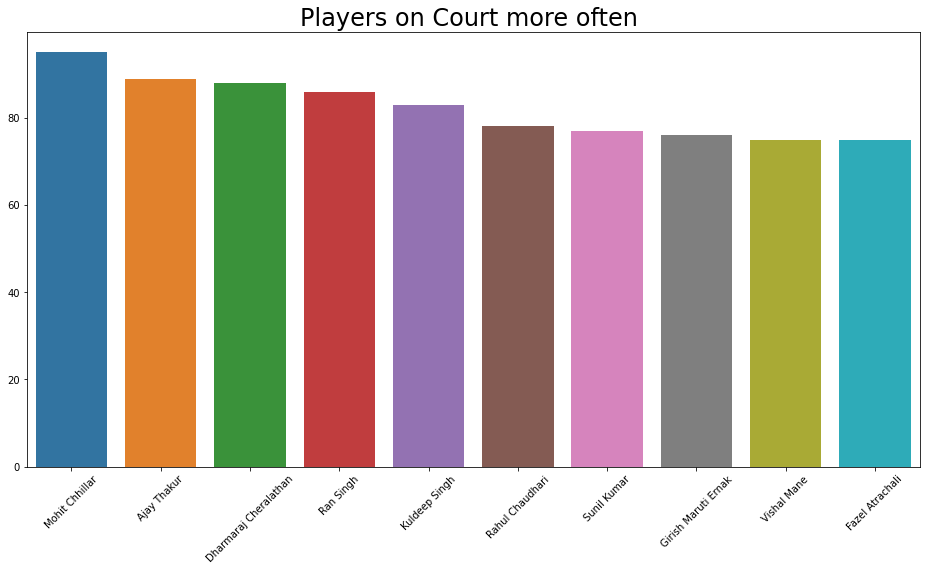

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
ax.set_title( "Players on Court more often " , size = 24 )
sns.barplot(x = c_player_name,y = c_y)
plt.xticks(rotation=45)

In [ ]:
# dfq4_v= pd.Series(q4.values)
# dfq4_v
# dfq4_k= pd.Series(q4.keys)
# dfq4_k

In [ ]:
a = q4.to_frame().reset_index()
a

,player_name,0
0,Mohit Chhillar,95
1,Ajay Thakur,89
2,Dharmaraj Cheralathan,88
3,Ran Singh,86
4,Kuldeep Singh,83
5,Rahul Chaudhari,78
6,Sunil Kumar,77
7,Girish Maruti Ernak,76
8,Vishal Mane,75
9,Fazel Atrachali,75


<b>5.  TOP 10 PLAYER WHO IS ON STARTER<b>

In [ ]:
df1 = df_player[df_player.player_on_starter == True]
df1.player_name
df1_count =  df1.pivot_table(index=['player_name'], aggfunc='size')
df1_count

player_name
Aakash Dattu Arsul     1
Abdul Shaikh           1
Abhilasha Mhatre       5
Abhinandhan Kumar      1
Abhishek Singh        24
                      ..
Yufen Lin              1
Yujung Wu              1
Zahra Abbasi           1
Zakir Hossain          4
Ziaur Rahman          37
Length: 629, dtype: int64

In [ ]:
q5 = df1_count.sort_values( ascending=False)
q5_v = q5.head(10)
q5_v

player_name
Ajay Thakur              128
Sandeep Narwal           127
Rahul Chaudhari          117
Rishank Devadiga         116
Mohit Chhillar           116
Dharmaraj Cheralathan    114
Pardeep Narwal           113
Manjeet Chhillar         113
Ran Singh                109
Jeeva Kumar              109
dtype: int64

In [ ]:
df_q5 = q5_v.to_frame().reset_index()
df_q5
# df_q5['player_name'].tolist()

,player_name,0
0,Ajay Thakur,128
1,Sandeep Narwal,127
2,Rahul Chaudhari,117
3,Rishank Devadiga,116
4,Mohit Chhillar,116
5,Dharmaraj Cheralathan,114
6,Pardeep Narwal,113
7,Manjeet Chhillar,113
8,Ran Singh,109
9,Jeeva Kumar,109


In [ ]:
df_q5['player_name']

0              Ajay Thakur
1           Sandeep Narwal
2          Rahul Chaudhari
3         Rishank Devadiga
4           Mohit Chhillar
5    Dharmaraj Cheralathan
6           Pardeep Narwal
7         Manjeet Chhillar
8                Ran Singh
9              Jeeva Kumar
Name: player_name, dtype: object

In [ ]:
# q5_labels = [
# 'Ajay Thakur',          
# 'Sandeep Narwal',          
# 'Rahul Chaudhari',          
# 'Rishank Devadiga',        
# 'Mohit Chhillar',         
# 'Dharmaraj Cheralathan',   
# 'Pardeep Narwal',          
# 'Manjeet Chhillar',      
# 'Ran Singh',              
# 'Jeeva Kumar'
# ]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

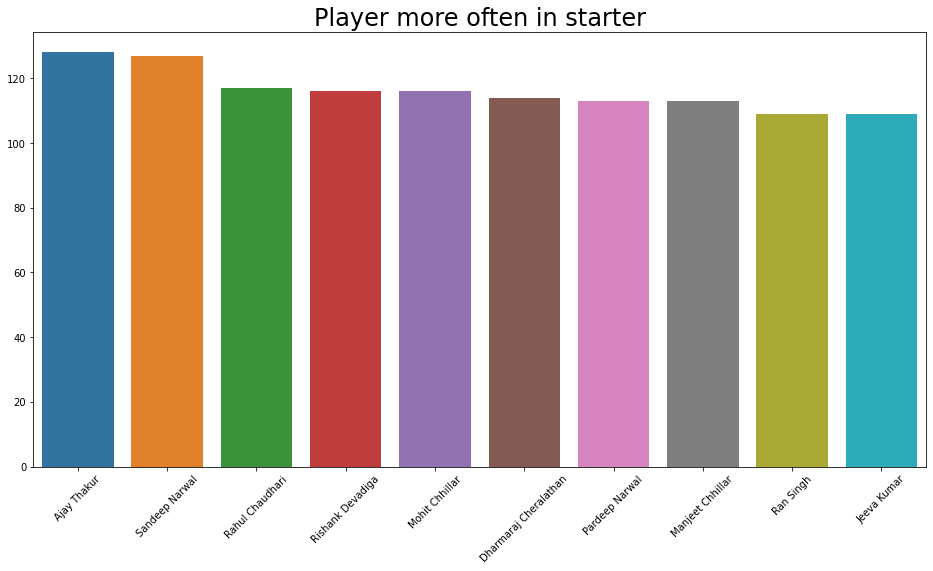

In [ ]:
fig, ax = plt.subplots(figsize = ( 16,8))
ax.set_title( "Player more often in starter" , size = 24 )
sns.barplot(x= q5_labels, y =q5_v )
plt.xticks(rotation=45)

<b>6.  ALL PLAYER WHO IS ON STARTER<b>

In [ ]:
df1 = df_player[df_player.player_on_starter == True]
df1.player_name
df1_count =  df1.pivot_table(columns=['player_name'], aggfunc='size')
df1_count

player_name
Aakash Dattu Arsul     1
Abdul Shaikh           1
Abhilasha Mhatre       5
Abhinandhan Kumar      1
Abhishek Singh        24
                      ..
Yufen Lin              1
Yujung Wu              1
Zahra Abbasi           1
Zakir Hossain          4
Ziaur Rahman          37
Length: 629, dtype: int64

<b>Stored All name in Text file<b>

In [ ]:
# starter = df_player[df_player['player_on_starter'] == True]
# starter
# q6 = starter.player_name
# q6.to_csv('q6_list_of starter_player.tsv', index=False) 

<b>Using group by : sum all points of that player and store in csv and concat in new csv named 'final_csv'<b> 

In [ ]:
# t_points = pl.groupby('player_name')['player_total_points'].sum()
# t_points.to_csv('q8_player_points.csv')

In [ ]:
final_csv = pd.read_csv('/content/drive/MyDrive/Hardik - Kabaddi/final_csv.csv')
final_csv

,Unnamed: 0,player_name,player_total_points,player_raids_total,player_raid_points_touch,player_raid_points_raid_bonus,player_tackle_points_total,player_tackle_points_touch,player_raids_successful,player_raids_unsuccessful,player_raids_Empty
0,0,A Arul,0,0,0,0,0,0,0,0,0
1,1,Aakash Dattu Arsul,0,0,0,0,0,0,0,0,0
2,2,Aashish Nagar,1,0,0,0,1,1,0,0,0
3,3,Abdul Shaikh,8,14,7,1,0,0,6,2,6
4,4,Abhilasha Mhatre,18,50,9,1,8,7,9,11,30
...,...,...,...,...,...,...,...,...,...,...,...
902,902,Yuvraj Pandeya,0,0,0,0,0,0,0,0,0
903,903,Zahra Abbasi,0,0,0,0,0,0,0,0,0
904,904,Zahra Karimi,0,0,0,0,0,0,0,0,0
905,905,Zakir Hossain,7,21,5,1,1,1,4,5,12


7.  All team with it's tackle points

In [ ]:
df_team['stats.points.tackle_points.total'] = df_team.groupby(['name'])['stats.points.tackle_points.total'].transform(max)
df_team

,Unnamed: 0,id,match_id,name,score,short_name,squad,state_of_play,state_of_play.is_raiding_now,state_of_play.last_raid.id,state_of_play.last_raid.result,state_of_play.players,state_of_play.players_on_court,stats.all_outs,stats.declare,stats.points.all_out,stats.points.declare,stats.points.extras,stats.points.raid_points.raid_bonus,stats.points.raid_points.total,stats.points.raid_points.touch,stats.points.tackle_points.capture,stats.points.tackle_points.capture_bonus,stats.points.tackle_points.total,stats.points.total,stats.raids.Empty,stats.raids.successful,stats.raids.super_raids,stats.raids.total,stats.raids.unsuccessful,stats.tackles.successful,stats.tackles.super_tackles,stats.tackles.total,stats.tackles.unsuccessful
0,0,3,1,Jaipur Pink Panthers,28,JAI,"[{'id': 15, 'name': 'Sanjay Shrestha', 'short_...",NaN,0.0,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,2,0,2,0,0,3,25,22,1,0,19,28,10,20,NaN,40,10,1,NaN,24,23
1,1,5,1,U Mumba,44,MUM,"[{'id': 54, 'name': 'Jeeva Kumar', 'short_name...",NaN,0.0,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,5,28,23,12,0,19,44,15,21,NaN,40,4,10,NaN,32,22
2,0,2,10,Dabang Delhi K.C.,39,DEL,"[{'id': 4, 'name': 'Ehsan Zamani Fard', 'short...",NaN,0.0,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,5,26,21,9,0,16,39,8,24,NaN,44,12,8,NaN,27,19
3,1,4,10,Bengal Warriors,40,KOL,"[{'id': 5, 'name': 'Farhad Kamal Gharibi', 'sh...",NaN,0.0,0.0,NaN,"[{'id': 0, 'is_raiding_now': False, 'on_court'...",0.0,4,0,4,0,0,6,25,19,11,0,18,40,20,16,NaN,45,9,11,NaN,32,21
4,0,2,100,Dabang Delhi,45,DEL,"[{'id': 58, 'name': 'Kashiling Adake', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,1,0,6,0,1,1,23,22,13,2,17,45,25,13,NaN,45,7,13,NaN,25,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1,4,97,Bengal Warriors,20,KOL,"[{'id': 163, 'name': 'Mahendra Ganesh Rajput',...",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,8,7,10,2,18,20,26,7,NaN,41,8,10,NaN,17,7
1364,0,6,98,Patna Pirates,30,PAT,"[{'id': 142, 'name': 'Sandeep Narwal', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,1,0,2,0,1,4,11,7,13,3,20,30,24,9,NaN,42,9,13,NaN,27,14
1365,1,1,98,Bengaluru Bulls,28,BEN,"[{'id': 195, 'name': 'Ashish Chhokar', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,1,0,2,0,5,2,16,14,5,0,19,28,14,15,NaN,43,14,5,NaN,12,7
1366,0,5,99,U Mumba,31,MUM,"[{'id': 34, 'name': 'Bhupender Singh', 'short_...",NaN,NaN,NaN,NaN,NaN,NaN,1,0,4,0,3,1,16,15,8,0,19,31,21,15,NaN,41,5,8,NaN,16,8


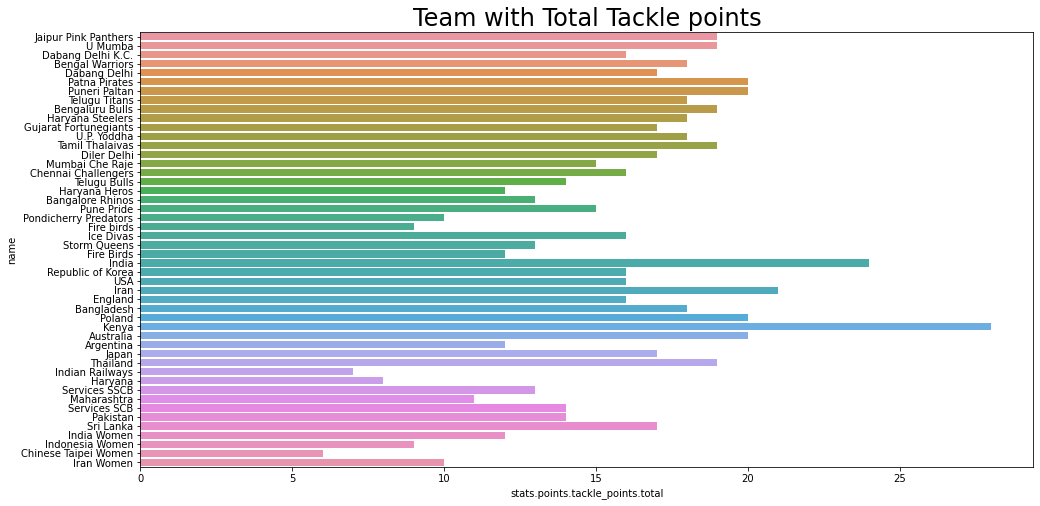

In [ ]:
fig, ax = plt.subplots(figsize = ( 16,8))
ax.set_title( "Team with Total Tackle points" , size = 24 )
sns.barplot(x="stats.points.tackle_points.total", y="name", data=df_team)

<b>8.  All Player with it's total points <b>

<Figure size 2304x1152 with 0 Axes>

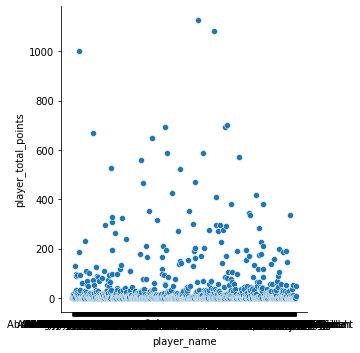

In [ ]:
plt.figure(figsize = (32,16))
sns.relplot(x="player_name", y="player_total_points", data=final_csv)




In [ ]:
# final_csv.columns

In [ ]:
# feature= [ 'player_total_points','player_raids_total', 'player_raid_points_touch','player_raid_points_raid_bonus', 'player_tackle_points_total','player_tackle_points_touch', 'player_raids_successful','player_raids_unsuccessful', 'player_raids_Empty']

In [ ]:
# list(enumerate(feature))

In [ ]:
# plt.figure(figsize = (32,16))
# for i in enumerate(feature):
#   sns.relplot(x="player_name", y=i[0]+1, data=final_csv)

<h1><b>Visualize All 9 to 16 Graph using For Loop<b><h1>

In [ ]:
# plt.figure(figsize = (32,16))
# for i, col in enumerate(final_csv.columns[2:]):
#     plt.figure(i)
#     sns.countplot(x=col, data=final_csv)

In [ ]:
top = final_csv.head(50)
top

,Unnamed: 0,player_name,player_total_points,player_raids_total,player_raid_points_touch,player_raid_points_raid_bonus,player_tackle_points_total,player_tackle_points_touch,player_raids_successful,player_raids_unsuccessful,player_raids_Empty
0,0,A Arul,0,0,0,0,0,0,0,0,0
1,1,Aakash Dattu Arsul,0,0,0,0,0,0,0,0,0
2,2,Aashish Nagar,1,0,0,0,1,1,0,0,0
3,3,Abdul Shaikh,8,14,7,1,0,0,6,2,6
4,4,Abhilasha Mhatre,18,50,9,1,8,7,9,11,30
5,5,Abhinandan Chandel,0,0,0,0,0,0,0,0,0
6,6,Abhinandan Kumar,0,0,0,0,0,0,0,0,0
7,7,Abhinandhan Kumar,12,14,8,1,3,2,7,4,3
8,8,Abhishek CR,0,0,0,0,0,0,0,0,0
9,9,Abhishek N,0,2,0,0,0,0,0,1,1


<Figure size 432x288 with 0 Axes>

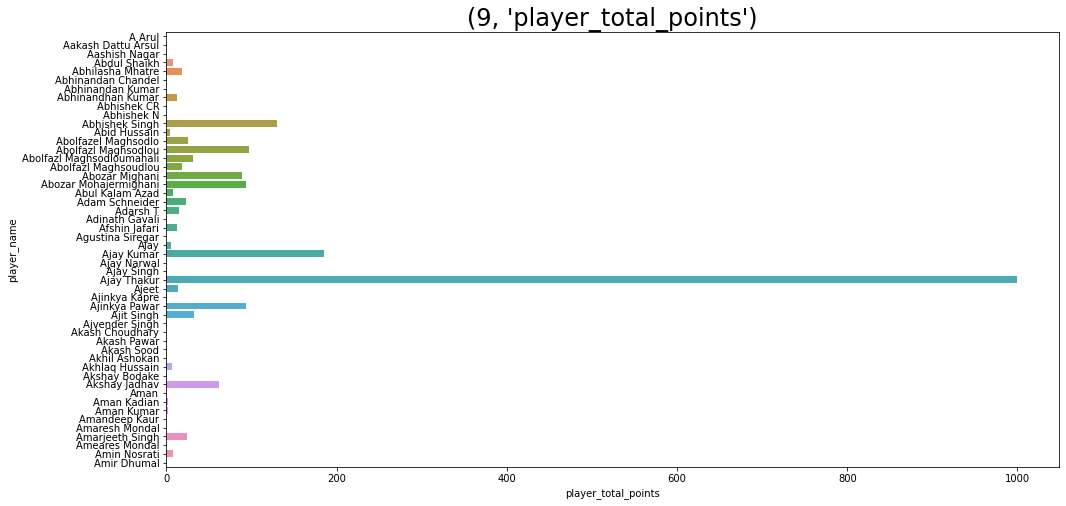

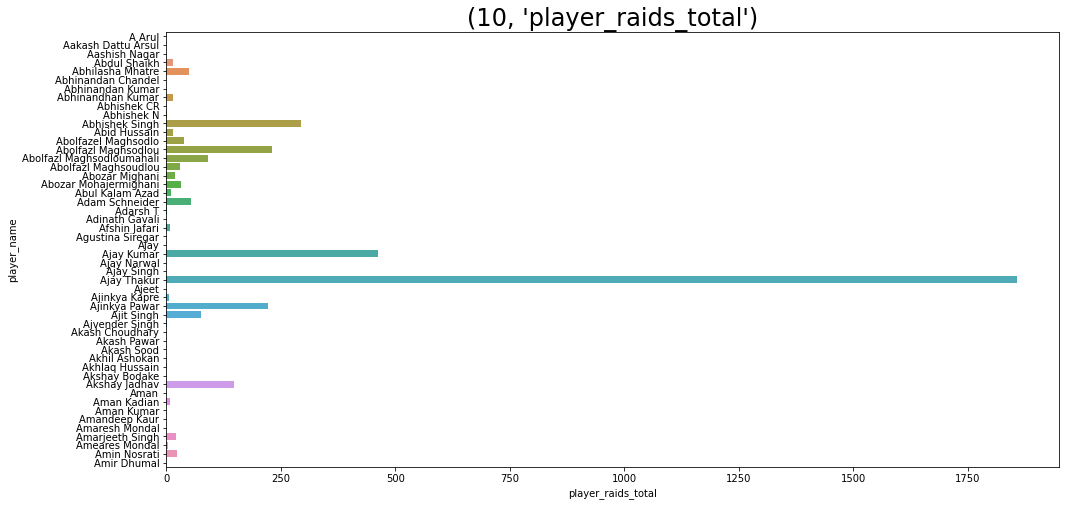

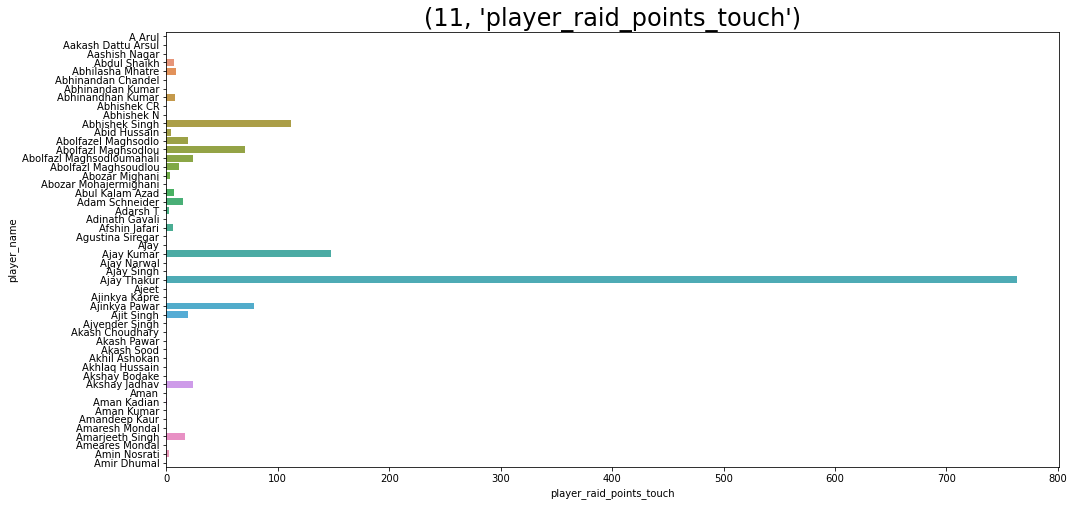

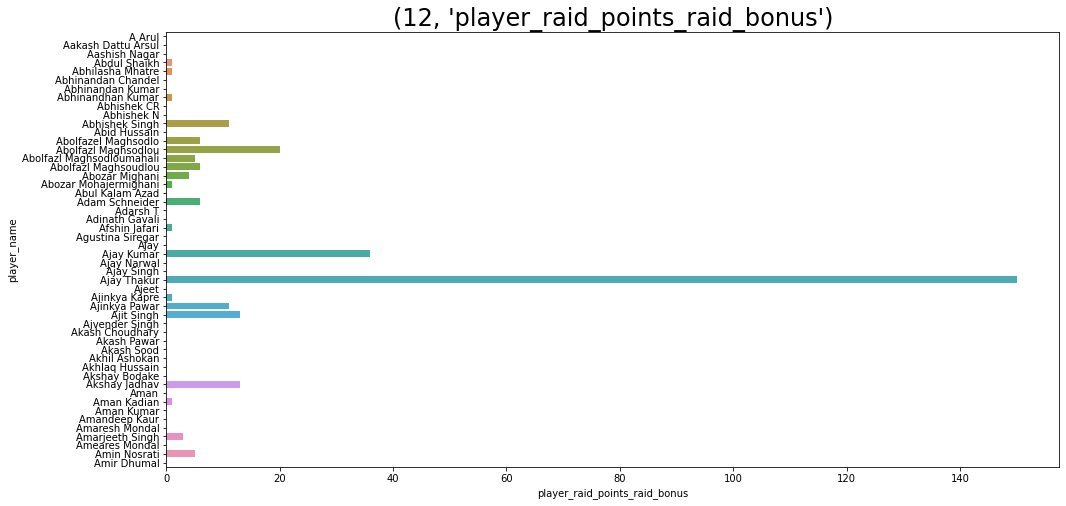

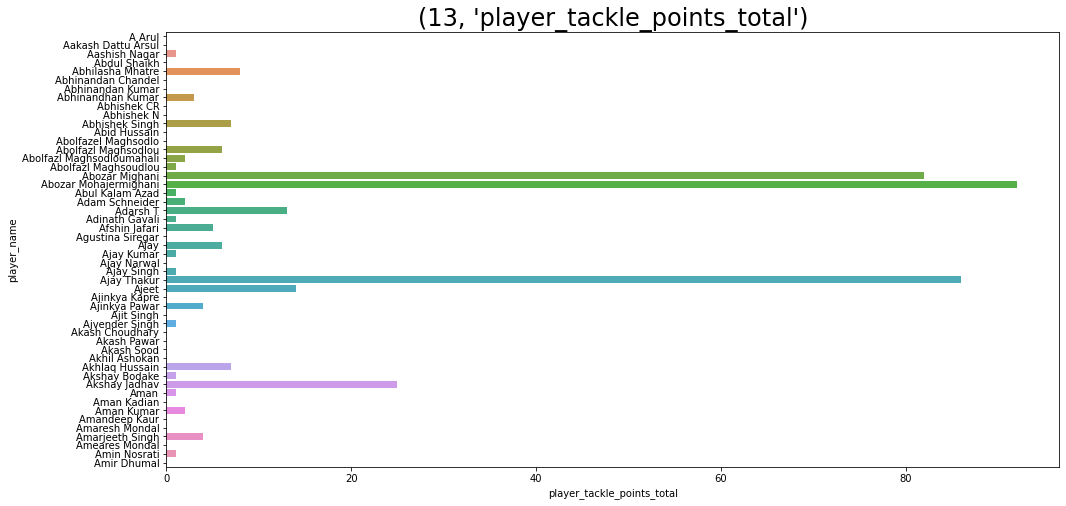

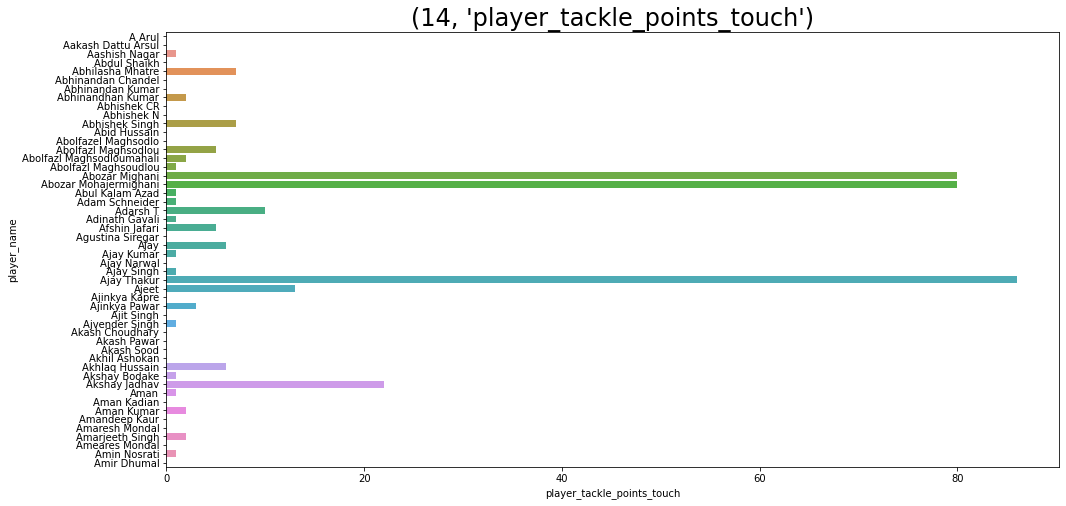

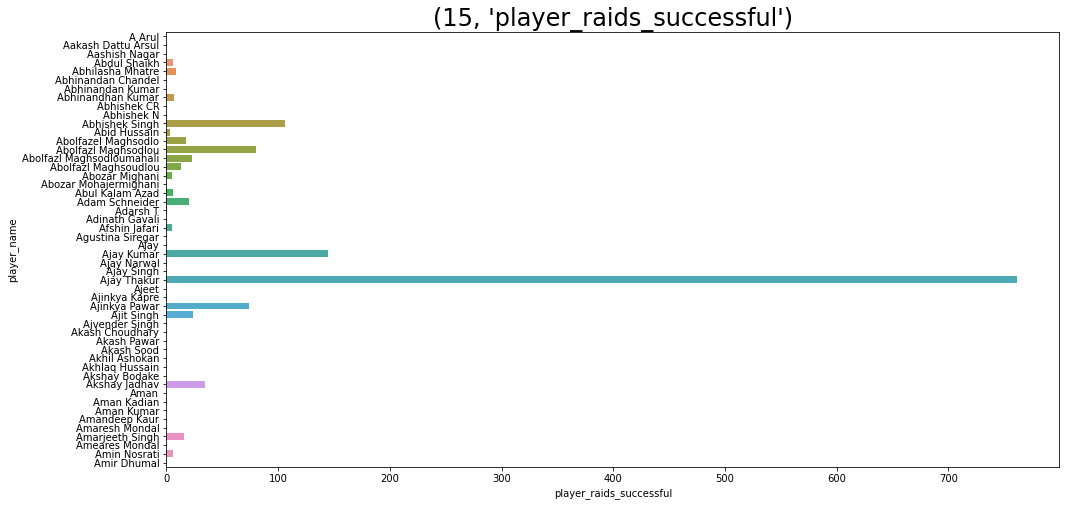

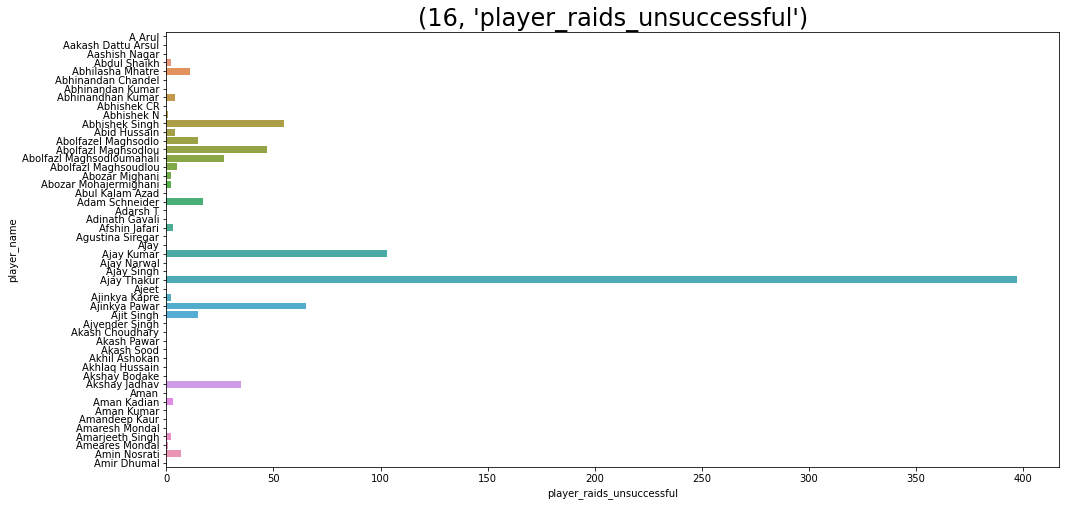

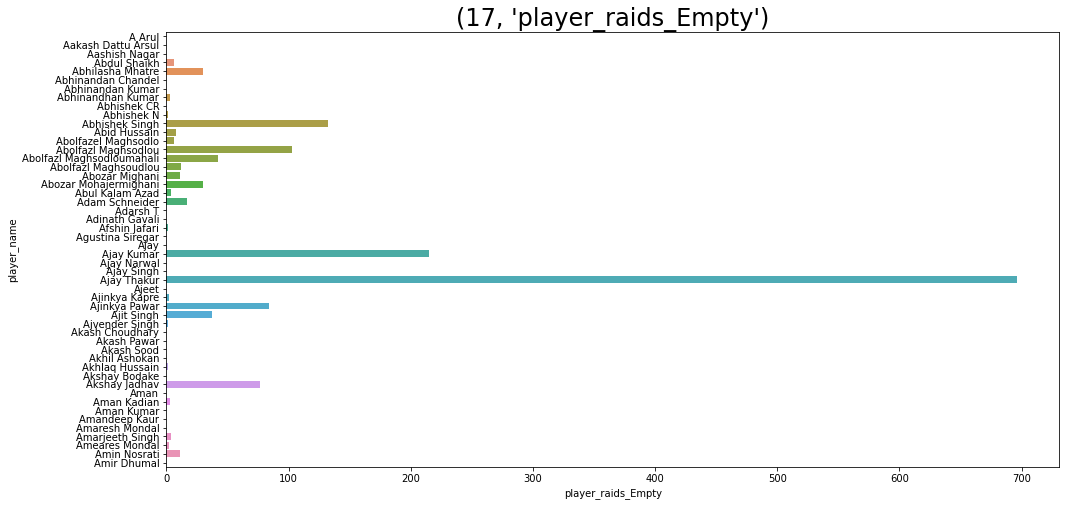

In [ ]:

for i, col in enumerate(top.columns[2:]):
    plt.figure(i)
    fig, ax = plt.subplots(figsize = ( 16,8))
    ax.set_title( (i+9,col) , size = 24 )
    sns.barplot(x=col,y = "player_name", data=top)